In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화(추세 등) 패키지
import seaborn as sns
# matploblib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

### step 1 데이터 속성 및 기술 통계량 확인
### step 2 목표변수 및 설명변수(명목형/수치형 변수별)의 분포 확인
### step 3 변수들의 결측 및 이상치 처리
### step 4 그래프 분석을 통해 변수간 관계를 확인
### step 5 생존에 영향을 미치는 잠재인자 도출

In [2]:
# titanic.CSV 데이터 가져오기
df = pd.read_csv("/home/pirl/test/BigData/titanic.csv", encoding='euc-kr')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### step 1 데이터 속성 및 기술 통계량 확인

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### step 2 목표변수 및 설명변수(명목형/수치형 변수별)의 분포 확인

In [4]:
# 수치형 변수
df_num = df.select_dtypes(exclude = "object")
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [5]:
df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 명목형 변수
df_char = df.select_dtypes(include = "object")
df_char.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [7]:
df_char.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Norman, Mr. Robert Douglas",male,1601,G6,S
freq,1,577,7,4,644


### step 3 변수들의 결측 및 이상치 처리

In [8]:
# 결측값 체크
df.isnull().sum()

# Cabin: 객실 번호
# Embarked: 승객이 탐승한 곳
# C(Cherbourg), Q(Queenstown), S(southampton)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df[df["Embarked"].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# df123 = df[df["Embarked"].isnull() == False]

In [11]:
df[df["Ticket"]== "113572"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
len(df[df["Embarked"] =="S"])

644

In [13]:
len(df[df["Embarked"] =="C"])

168

In [14]:
len(df[df["Embarked"] =="Q"])

77

In [15]:
df["Embarked"].fillna("S", inplace = True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### step 4 그래프 분석을 통해 변수간 관계를 확인

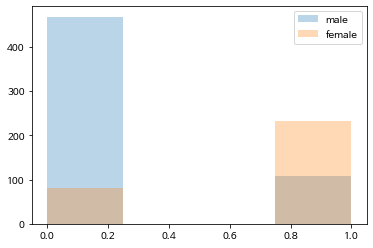

In [23]:
# matplotlib.pyplot, hist mehtod 이용하여 중첩 histogram 생성
# hist(변수, label = "표시 값", alpha = 투명도(0~1 지정))
plt.hist(df[df["Sex"] == "male"]["Survived"], label = "male", alpha = 0.3, bins = 4)
plt.hist(df[df["Sex"] == "female"]["Survived"], label = "female", alpha = 0.3, bins = 4)
plt.legend()

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [24]:
# 0 ~ 10세 0
# 10 ~ 20세 1
# 20 ~ 40세 2
# 40 ~ 60세 3
# 60세 이상 4

df["AgeGroup"] = 0
df["AgeGroup"][df["Age"] > 10] = 1

df["AgeGroup"][df["Age"] > 20] = 2

df["AgeGroup"][df["Age"] > 40] = 3

df["AgeGroup"][df["Age"] > 60] = 4


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home

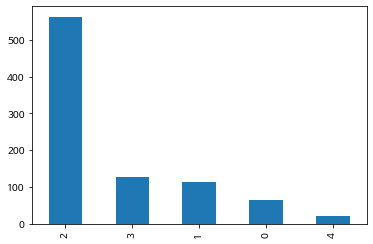

In [26]:
df_AgeGroup = df["AgeGroup"].value_counts()
df_AgeGroup.plot.bar()

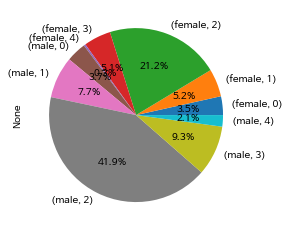

In [35]:
# 성별+연령대 Pie Chart
df_count =  df.groupby(["Sex", "AgeGroup"]).size()
df_count.plot.pie(y= "OXY", autopct = "%.1f%%")

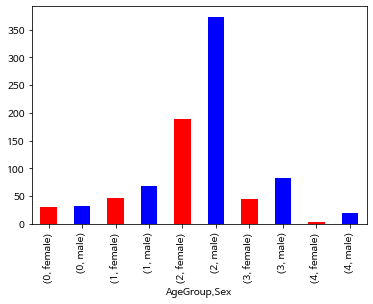

In [139]:
# Sex * AgeGroup 별 인구 수
df_group_total = df.groupby(["AgeGroup", "Sex"]).size()
# df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("count") #위와 동일
df_group_total.plot.bar(color=('r', 'b'))

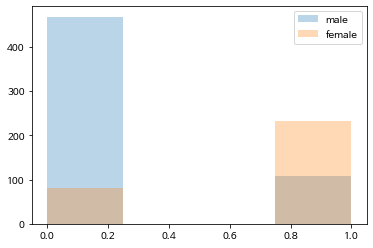

In [36]:
# matplotlib.pyplot, hist mehtod 이용하여 중첩 histogram 생성
# hist(변수, label = "표시 값", alpha = 투명도(0~1 지정))
plt.hist(df[df["Sex"] == "male"]["Survived"], label = "male", alpha = 0.3, bins = 4)
plt.hist(df[df["Sex"] == "female"]["Survived"], label = "female", alpha = 0.3, bins = 4)
plt.legend()

### step 5 생존에 영향을 미치는 잠재인자 도출

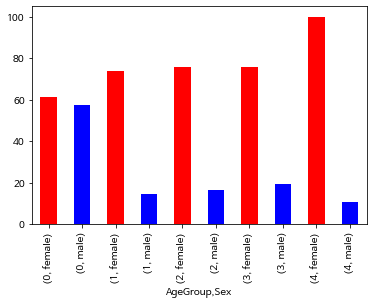

In [141]:
# Sex * AgeGroup 별 생존률
df_group_total = df.groupby(["AgeGroup", "Sex"]).apply(lambda d: (d.Survived *100 / d["PassengerId"].size ).sum())
df_group_total.plot.bar(color=('r', 'b'))